In [1]:
using DSP, CSV, FFTW
using Plots; gr()


Plots.GRBackend()

In [2]:
file_temp = "temp.csv"
if !isfile(file_temp)
	run(`curl -L https://datahub.io/core/global-temp/r/1.csv -o $file_temp`)
end
d = reverse(CSV.File(file_temp).Mean); #Starting at year 1880

In [32]:
d₁ = [d; reverse(d)]; # flip input to join start/end continuously
d₁_fft = fft(d₁); @show d₁[1], d₁_fft[1], size(d₁);

(d₁[1], d₁_fft[1], size(d₁)) = (-0.3, 240.60579999999987 + 2.5202062658991053e-14im, (6576,))


In [26]:
𝑓ₛ = 1.0;   # sampling frequency
𝑓₋ = 0.01;  # frequency cutoff, less than Fnyquist=0.5
Nc = 100  #Fourier spectrum samples kept (truncated beyond f >= Nc/N)

100

In [27]:
filt = digitalfilter(Lowpass(𝑓₋,fs=𝑓ₛ), Butterworth(6));
d₂ = filtfilt(filt, d₁)  #filtered signal
d₂_fft = fft(d₂);

In [28]:
N = length(d₁);
Iₓ = 1:N; # Indexes
𝑓ⁿ = LinRange(-0.5, 0.5, N+1)[1:N]  # normalized frequency 
𝑓₀ = (Nc-1)/N  # maximum frequency component kept

0.015054744525547446

In [29]:
d₃_fft_trunc = [d₂_fft[1:Nc]; fill(0.0,N-2Nc+1); conj(d₂_fft[Nc:-1:2])]
d₃_trunc = real(ifft(d₃_fft_trunc)); # time signal from truncated spectrum

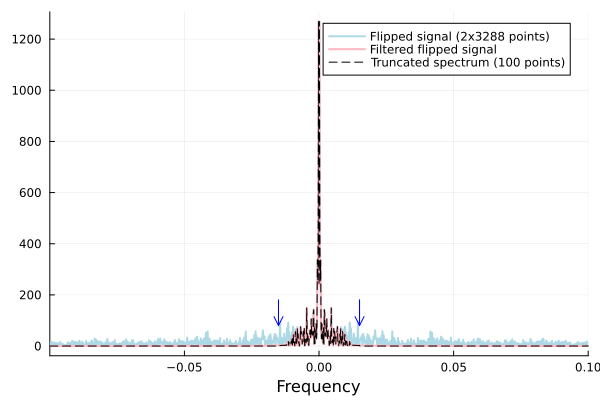

In [30]:
p2 = plot(𝑓ⁿ, abs.(fftshift(d₁_fft)), lw=2,lc=:blues,label="Flipped signal (2x3288 points)", xlim=(-0.1,0.1))
plot!(𝑓ⁿ, abs.(fftshift(d₂_fft)), lw=2,lc=:reds,label="Filtered flipped signal",xlabel="Frequency")
plot!(𝑓ⁿ, abs.(fftshift(d₃_fft_trunc)), ls=:dash,lw=1,lc=:black,label="Truncated spectrum (100 points)")
quiver!([-𝑓₀,𝑓₀],[180,180], quiver=([0,0],[-100,-100]), lc=:blue)

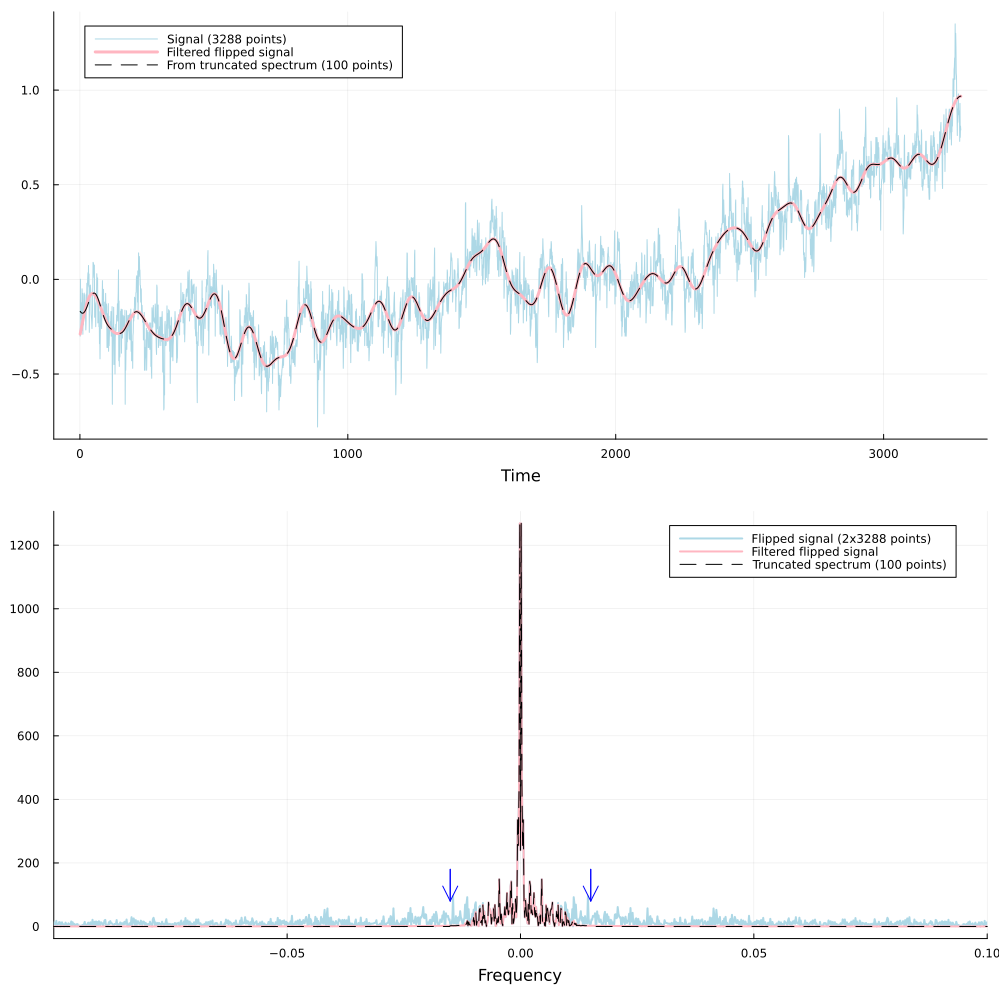

In [31]:
p1 = plot(Iₓ[1:N÷2], d₁[1:N÷2], lc=:blues,label="Signal (3288 points)", legend=:topleft)
plot!(Iₓ[1:N÷2], d₂[1:N÷2], lc=:reds, lw=3,label="Filtered flipped signal",xlabel="Time")
plot!(Iₓ[1:N÷2], d₃_trunc[1:N÷2], ls=:dash,lc=:black, lw=1,label="From truncated spectrum (100 points)")
plot(p1,p2,layout=(2,1), size=(1000,1000))

# References
- [ ] [How to use Fourier Filter on Complex Data](https://discourse.julialang.org/t/how-to-use-fourier-filter-on-complex-data/54967/8)